In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input


# Set random seeds for reproducibility
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

np.random.seed(seed)
tf.random.set_seed(seed)

# GPU setup
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Paths to datasets
train_path = './train'
valid_path = './valid'
test_path = './test'

# Parameters
img_height, img_width = 224, 224
batch_size = 4
num_classes = 2

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,

    rotation_range=30,         
    brightness_range=[0.6, 1.4],  
    width_shift_range=0.2,     
    height_shift_range=0.2,    
    shear_range=0.2,           
    zoom_range=0.2,            
    channel_shift_range=20,   
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_datagen.flow_from_directory(
    directory=train_path, target_size=(img_height, img_width), shuffle=True, batch_size=batch_size, class_mode='binary',seed=seed
)

valid_batches = datagen.flow_from_directory(
    directory=valid_path, target_size=(img_height, img_width), batch_size=batch_size,shuffle=False, class_mode='binary',seed=seed
)

test_batches = datagen.flow_from_directory(
    directory=test_path, target_size=(img_height, img_width), batch_size=batch_size, shuffle=False, class_mode='binary'
)


# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


#for layer in base_model.layers:
    #layer.trainable = True

for i, layer in enumerate(base_model.layers):
    if 'conv1_' in layer.name or 'pool1' in layer.name or 'conv2_' in layer.name or 'conv3_' in layer.name :
        layer.trainable = True
        print(f"Layer affected: {layer.name}")
    else:
       layer.trainable = False


# Add custom layers
base_model_output = GlobalAveragePooling2D()(base_model.output)
x = Dense(units=512, activation='relu')(base_model_output)
x = Dropout(0.5)(x)  
output = Dense(units=1, activation='sigmoid')(x)  

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Create the complete model
model = Model(inputs=base_model.input, outputs=output)
print(model.summary())

2025-05-17 13:01:24.120038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747479684.164901 1621893 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747479684.182827 1621893 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747479684.268586 1621893 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747479684.268637 1621893 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747479684.268639 1621893 computation_placer.cc:177] computation placer alr

Num GPUs Available:  1
Found 8000 images belonging to 2 classes.
Found 770 images belonging to 2 classes.
Found 770 images belonging to 2 classes.


I0000 00:00:1747479691.114982 1621893 gpu_process_state.cc:208] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1747479691.115745 1621893 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5582 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Layer affected: conv1_pad
Layer affected: conv1_conv
Layer affected: conv1_bn
Layer affected: conv1_relu
Layer affected: pool1_pad
Layer affected: pool1_pool
Layer affected: conv2_block1_1_conv
Layer affected: conv2_block1_1_bn
Layer affected: conv2_block1_1_relu
Layer affected: conv2_block1_2_conv
Layer affected: conv2_block1_2_bn
Layer affected: conv2_block1_2_relu
Layer affected: conv2_block1_0_conv
Layer affected: conv2_block1_3_conv
Layer affected: conv2_block1_0_bn
Layer affected: conv2_block1_3_bn
Layer affected: conv2_block1_add
Layer affected: conv2_block1_out
Layer affected: conv2_block2_1_conv
Layer affected: conv2_block2_1_bn
Layer affected: conv2_block2_1_relu
Layer affected: conv2_block2_2_conv
Layer affected: conv2_block2_2_bn
Layer affected: conv2_block2_2_relu
Layer affected: conv2_block2_3_conv
Layer affected: conv2_block2_3_bn
Layer affected: conv2_block2_add
Layer affected: conv2_block2_out
Layer affected: conv2_block3_1_conv
Layer affected: conv2_block3_1_bn
Layer 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 2,499,585 (9.54 MB)

 Non-trainable params: 22,137,728 (84.45 MB)

None


In [2]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
# model.summary()

In [6]:
# Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1)
early_stopping = EarlyStopping(
   monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1)

In [7]:
# Train the model
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=200,
    verbose=2,

    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/200


/home/tiamat_hd/ThesisWork/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747479715.839535 1622063 cuda_dnn.cc:529] Loaded cuDNN version 90300


2000/2000 - 281s - 140ms/step - accuracy: 0.7675 - loss: 0.5050 - val_accuracy: 0.8623 - val_loss: 0.3186 - learning_rate: 1.0000e-04
Epoch 2/200
2000/2000 - 260s - 130ms/step - accuracy: 0.8484 - loss: 0.3600 - val_accuracy: 0.8961 - val_loss: 0.2452 - learning_rate: 1.0000e-04
Epoch 3/200
2000/2000 - 271s - 136ms/step - accuracy: 0.8589 - loss: 0.3329 - val_accuracy: 0.8584 - val_loss: 0.3323 - learning_rate: 1.0000e-04
Epoch 4/200
2000/2000 - 275s - 138ms/step - accuracy: 0.8692 - loss: 0.3115 - val_accuracy: 0.9117 - val_loss: 0.2194 - learning_rate: 1.0000e-04
Epoch 5/200
2000/2000 - 258s - 129ms/step - accuracy: 0.8777 - loss: 0.2887 - val_accuracy: 0.9117 - val_loss: 0.2384 - learning_rate: 1.0000e-04
Epoch 6/200
2000/2000 - 248s - 124ms/step - accuracy: 0.8867 - loss: 0.2775 - val_accuracy: 0.9039 - val_loss: 0.2328 - learning_rate: 1.0000e-04
Epoch 7/200
2000/2000 - 252s - 126ms/step - accuracy: 0.8904 - loss: 0.2715 - val_accuracy: 0.9169 - val_loss: 0.2073 - learning_rate: 1

In [45]:
# Find best epoch based on validation loss
best_epoch = np.argmin(history.history['val_loss']) + 1  # +1 because epochs are 1-based
best_train_acc = history.history['accuracy'][best_epoch - 1]
best_train_loss = history.history['loss'][best_epoch - 1]
best_val_acc = history.history['val_accuracy'][best_epoch - 1]
best_val_loss = history.history['val_loss'][best_epoch - 1]

# Print best epoch's metrics
print(f"\n🔥 Best Epoch: {best_epoch}")
print(f"✅ Best Training Accuracy: {best_train_acc:.4f}, Training Loss: {best_train_loss:.4f}")
print(f"🎯 Best Validation Accuracy: {best_val_acc:.4f}, Validation Loss: {best_val_loss:.4f}")

NameError: name 'history' is not defined

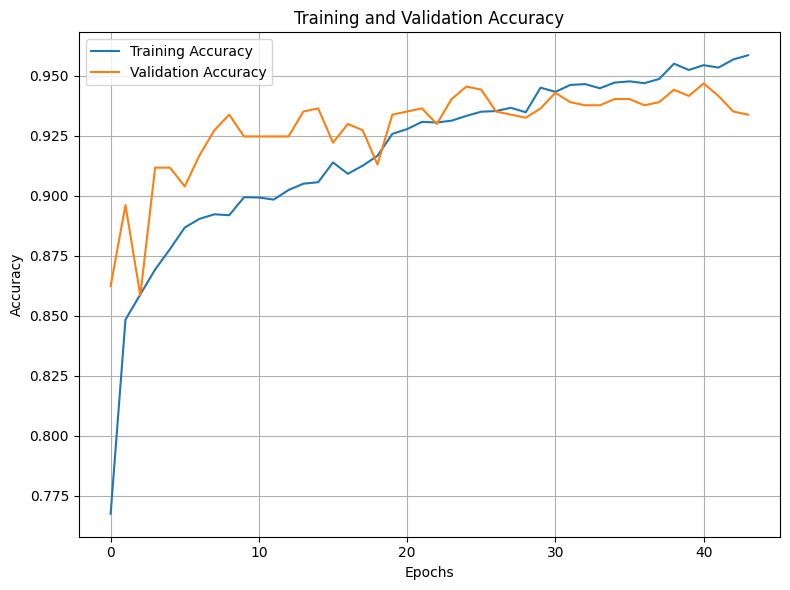

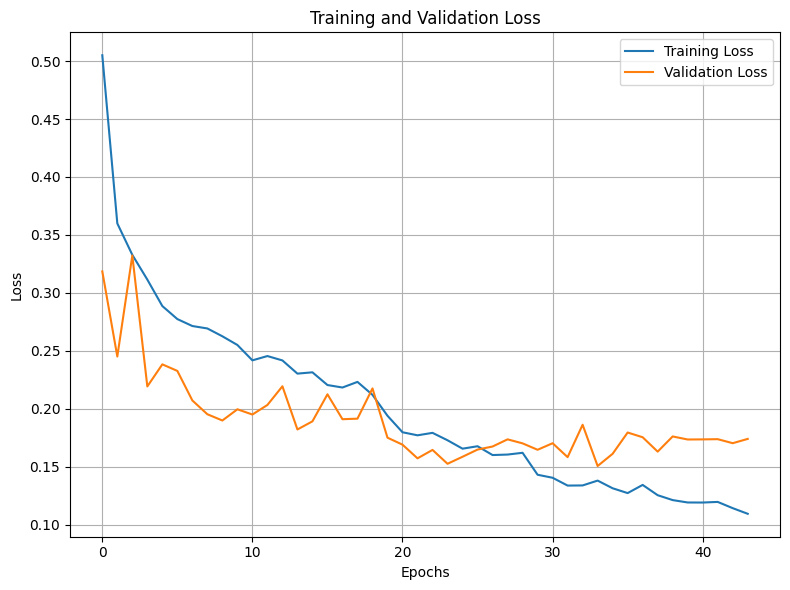

In [8]:
# Plot Accuracy (no markers)
from matplotlib import pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Save the final model
model.save("Resnet50_Model_Final_PPI.keras")
print("Model saved as 'Resnet50_Model_Final.keras'")

Model saved as 'Resnet50_Model_Final.keras'


In [10]:
# Load the model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('./Resnet50_Model_Final_PPI.keras')  

/home/tiamat_hd/ThesisWork/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9112 - loss: 0.2275
Test Loss: 0.2021, Test Accuracy: 0.9208
193/193 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step


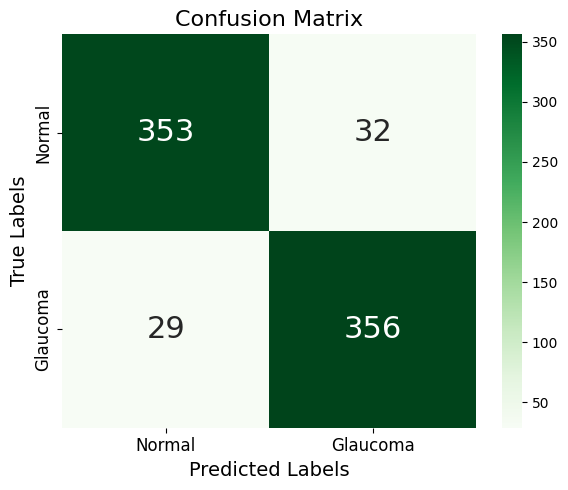

AUC Score: 0.9769


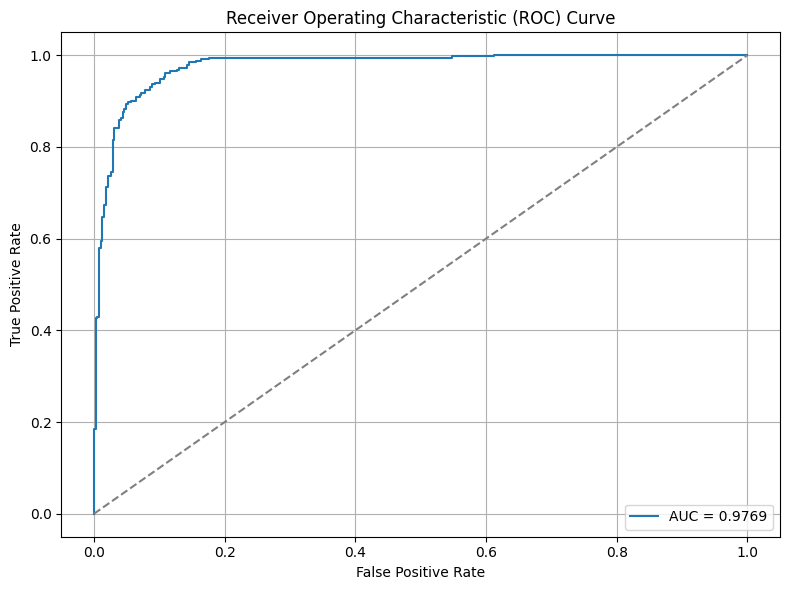

,precision,recall,f1-score,support
Normal,0.924084,0.916883,0.920469,385.000000
Glaucoma,0.917526,0.924675,0.921087,385.000000
accuracy,0.920779,0.920779,0.920779,0.920779
macro avg,0.920805,0.920779,0.920778,770.000000
weighted avg,0.920805,0.920779,0.920778,770.000000


In [11]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Model Evaluation
score = loaded_model.evaluate(test_batches, verbose=1)
print(f"Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}")

# Predictions
pred = loaded_model.predict(test_batches, verbose=1)
test_labels = test_batches.labels

# If sigmoid output
test_pred_labels = np.round(pred).astype(int).flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_pred_labels)

# Define class names
class_names = ['Normal', 'Glaucoma']

# Create the heatmap
plt.figure(figsize=(6, 5))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
           xticklabels=class_names,
           yticklabels=class_names,
           annot_kws={"size": 22})  # Large numbers in cells

# Set axis labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Confusion Matrix', fontsize=16)

plt.tight_layout()
plt.show()
# AUC Score (needs predicted probabilities)
auc_score = roc_auc_score(test_labels, pred)
print(f"AUC Score: {auc_score:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
# Classification Report
test_report = classification_report(test_labels, test_pred_labels,
                                    target_names=['Normal', 'Glaucoma'],
                                    output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df



In [52]:
# Confidence intervals using bootstrapping

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from tqdm import tqdm
import numpy as np

# Number of bootstrap iterations
n_iterations = 10000
rng = np.random.default_rng(seed=42)

# Metric containers
acc_scores = []
auc_scores = []

prec_0, prec_1 = [], []
rec_0, rec_1 = [], []
f1_0, f1_1 = [], []

# Bootstrapping loop
for _ in tqdm(range(n_iterations), desc="Bootstrapping"):
    indices = rng.choice(len(test_labels), len(test_labels), replace=True)
    y_true_sample = test_labels[indices]
    y_pred_sample = test_pred_labels[indices]
    y_prob_sample = pred[indices]

    acc_scores.append(accuracy_score(y_true_sample, y_pred_sample))
    auc_scores.append(roc_auc_score(y_true_sample, y_prob_sample))

    precision = precision_score(y_true_sample, y_pred_sample, average=None, zero_division=0)
    recall = recall_score(y_true_sample, y_pred_sample, average=None, zero_division=0)
    f1 = f1_score(y_true_sample, y_pred_sample, average=None, zero_division=0)

    prec_0.append(precision[0])
    prec_1.append(precision[1])
    rec_0.append(recall[0])
    rec_1.append(recall[1])
    f1_0.append(f1[0])
    f1_1.append(f1[1])

# Confidence interval function
def ci_bounds(metric_scores, confidence=0.95):
    lower = np.percentile(metric_scores, (1 - confidence) / 2 * 100)
    upper = np.percentile(metric_scores, (1 + confidence) / 2 * 100)
    return round(lower * 100, 2), round(upper * 100, 2)

# Print results with proper 95% CI format
print("\nMetric Estimates with 95% CI:")

# Overall metrics
acc_ci = ci_bounds(acc_scores)
auc_ci = ci_bounds(auc_scores)
print(f"Accuracy: {round(np.mean(acc_scores) * 100, 2)}% [95% CI: {acc_ci[0]}–{acc_ci[1]}]")
print(f"AUC Score: {round(np.mean(auc_scores) * 100, 2)}% [95% CI: {auc_ci[0]}–{auc_ci[1]}]")

# Class 0 (Normal)
print("\nNormal (Class 0):")
print(f"Precision: {round(np.mean(prec_0) * 100, 2)}% [95% CI: {ci_bounds(prec_0)[0]}–{ci_bounds(prec_0)[1]}]")
print(f"Recall: {round(np.mean(rec_0) * 100, 2)}% [95% CI: {ci_bounds(rec_0)[0]}–{ci_bounds(rec_0)[1]}]")
print(f"F1 Score: {round(np.mean(f1_0) * 100, 2)}% [95% CI: {ci_bounds(f1_0)[0]}–{ci_bounds(f1_0)[1]}]")

# Class 1 (Glaucoma)
print("\nGlaucoma (Class 1):")
print(f"Precision: {round(np.mean(prec_1) * 100, 2)}% [95% CI: {ci_bounds(prec_1)[0]}–{ci_bounds(prec_1)[1]}]")
print(f"Recall: {round(np.mean(rec_1) * 100, 2)}% [95% CI: {ci_bounds(rec_1)[0]}–{ci_bounds(rec_1)[1]}]")
print(f"F1 Score: {round(np.mean(f1_1) * 100, 2)}% [95% CI: {ci_bounds(f1_1)[0]}–{ci_bounds(f1_1)[1]}]")


Bootstrapping: 100%|██████████| 10000/10000 [00:43<00:00, 232.17it/s]


Metric Estimates with 95% CI:
Accuracy: 93.25% [95% CI: 91.43–95.06]
AUC Score: 98.01% [95% CI: 97.08–98.79]

Normal (Class 0):
Precision: 95.63% [95% CI: 93.41–97.57]
Recall: 90.64% [95% CI: 87.63–93.48]
F1 Score: 93.06% [95% CI: 91.06–94.89]

Glaucoma (Class 1):
Precision: 91.1% [95% CI: 88.28–93.86]
Recall: 95.85% [95% CI: 93.73–97.71]
F1 Score: 93.41% [95% CI: 91.54–95.19]


In [44]:
import tensorflow as tf
import numpy as np
import time

# Warm-up the model (important!)
_ = loaded_model.predict(next(iter(test_batches))[0], verbose=0)

# Create a test input (you can change shape if needed)
sample_input = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Convert model to callable function for optimization
@tf.function
def run_inference(x):
    return model(x, training=False)

# Run several dry runs to warm up TensorFlow internals
for _ in range(10):
    _ = run_inference(sample_input)

# Time the inference using tf.profiler-like accuracy
repeats = 100
start = time.perf_counter()
for _ in range(repeats):
    _ = run_inference(sample_input)
end = time.perf_counter()

avg_time = (end - start) / repeats
print(f"🧪 Stable Average Inference Time per Image: {avg_time * 1000:.4f} ms")


2025-05-11 05:45:06.592596: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


🧪 Stable Average Inference Time per Image: 14.3084 ms


2025-05-19 08:11:55.211885: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


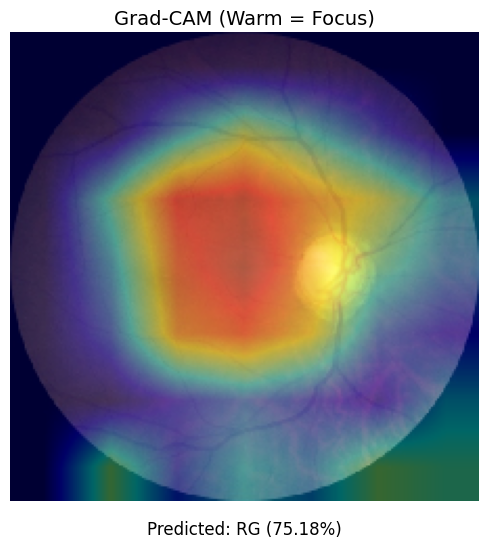

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Grad-CAM Heatmap Generator (normal heatmap, not inverted data)
def make_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())

    return heatmap.numpy()

# Display Grad-CAM with inverted colormap but warm = focus
def display_gradcam(img_path, model, last_conv_layer_name, class_indices):
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)

    # Predict
    pred_prob = model.predict(img_array)[0][0]
    pred_class = int(pred_prob >= 0.5)
    reverse_class_indices = {v: k for k, v in class_indices.items()}
    label = f"Predicted: {reverse_class_indices[pred_class]} ({pred_prob:.2%})"

    # Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(model, img_array, last_conv_layer_name)
    heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
    heatmap = np.uint8(255 * heatmap)

    # Invert colormap: high value = red (warm focus), low = blue
    heatmap_color = cv2.applyColorMap(255 - heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on original image
    original_image = np.array(img).astype(np.uint8)
    superimposed_img = cv2.addWeighted(original_image, 0.6, heatmap_color, 0.4, 0)

    # Display with clean layout and title/text
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(superimposed_img)
    ax.axis('off')
    plt.title("Grad-CAM (Warm = Focus)", fontsize=14)

    # Add prediction text below image
    fig.text(0.5, 0.05, label, ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.08, 1, 0.95])
    plt.show()

# ========================
# Run Grad-CAM
# ========================
img_path = r"./test/RG/EyePACS-TRAIN-RG-2898.jpg"  # Your image path
last_conv_layer_name = 'conv5_block3_out'  # Replace with your model’s last conv layer
display_gradcam(img_path, loaded_model, last_conv_layer_name, test_batches.class_indices)
